# 확률통계_1.pdf

## 데이터 --- p.1~
- 질적 변수 : 선택이 필요한 변수, 종류를 구별하기 위한 변수
    - ex1) 1.매우좋음 2.좋음 3.보통 4.나쁨 5.매우나쁨
    - ex2) A형 B형 O형 AB형
- 양적 변수 : 양을 표현하는 변수

척도 수준
- 질적 척도(범주형 자료, 숫자들의 크기 차이가 계산되지 않는 척도)
    - 명목척도, 순서척도
- 양적 척도(수치형 자료, 숫자들의 크기 차이를 계산할 수 있는 척도)
    - 구간척도(=등간척도), 비율척도


| 척도     | 설명 | 예                             | 대소관계 | 차이 | 비 |
|----------|------|--------------------------------|----------|------|----|
| 명목척도 | 측정 대상이 어느 집단에 속하는지 분류할 때 사용     | 성별, 출생지 구분              | x        | x    | x  |
| 순서척도 | 측정 대상의 서열관계를 관측하는 척도     | 만족도, 선호도, 학년, 신용등급 | o        | x    | x  |
| 구간척도 | 측정 대상이 갖고 있는 속성의 양을 측정하는 것으로 구간이나 구간 사이의 간격이 의미가 있는 자료     | 온도, 지수                     | o        | o    | x  |
| 비율척도 | 간격(차이)에 대한 비율이 의미를 가지는 자료, 절대적 기준인 0이 존재하고 사칙연산이 가능하며 제일 많은 정보를 가지는 척도     | 무게, 나이, 시간, 거리         | o        | o    | o  |


이산형 변수
- 하나하나의 값을 취하는 변수
- 서로 인접한 숫자 사이에 값이 존재하지 않음
- 주사위의 눈, 결석 횟수, 결석 학생 수

연속형 변수
- 연속적인 값을 취할 수 있는 변수
- 어떤 두 숫자 사이에도 반드시 숫자가 존재
- 길이, 무게, 시간

In [ ]:
# Pandas를 pd라는 이름으로 임포트한다
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

%matplotlib inline

In [ ]:
df = pd.read_csv('./data/ch1_sport_test.csv',
                index_col='학생번호')
df

In [ ]:
df['악력']

In [ ]:
print(df.shape,'\n-> 데이터 개수 10(레코드 수), 변수 개수 5(컬럼 수)')

## 1차원 데이터 --- p.10~12
- 데이터 중심의 지표
- 데이터의 산포도 지표
- 데이터의 정규화
- 1차원 데이터의 시각화


In [ ]:
df=pd.read_csv('./data/ch2_scores_em.csv',
              index_col='student number')

display(df.head())
print('type(df) :{}'.format(type(df)))
print('df.shape : {}'.format(df.shape))

학번 순서대로 10명의 영어 점수를 array 데이터 구조 scores에 저장

In [ ]:
scores = np.array(df['english'])[:10]
scores

데이터프레임 scores_df 작성

In [ ]:
scores_df = pd.DataFrame({'score' : scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J' ],
                                      name='student')
                        )
display(scores_df.head())
print('type(scores_df) : {}'. format(type(scores_df)))

### 평균값 --- p.13~14
- 평균값은 데이터를 모두 더한 뒤, 데이터의 개수로 나누어 구함
$$
\frac{42+69+56+41+57+48+65+49+65+58}{10}=55
$$
$$
\bar{x}=\frac{1}{n}\sum_{i=1}^{n}{x_i} = \frac{1}{n}(x_1+x_2+ \cdots +x_n)
$$

sum(scores)이 \sum_{i=1}^{n}{x_i}, len(scores)이 n에 대응

In [ ]:
sum(scores)/len(scores)

In [ ]:
np.mean(scores)

In [ ]:
scores_df.mean()

In [ ]:
data = np.array([10,20,30,40,50,60,70,80,90,1000])

print('data : {}'.format(data))
print('np.mean(data) : {}'.format(np.mean(data)))
print('-> 평균은 이상치에 영향을 많이 받음')

### 중앙값 --- p.15~16
- 중앙값은 데이터를 크기 순서대로 나열할 때 정확히 중앙에 위치한 값
- 이상값에 영향을 덜 받음
- 데이터의 개수 n이 홀수이면, $\frac{(n+1)}{2}$번 째 데이터가 중앙값
- 데이터의 개수 n이 짝수이면, $\frac{n}{2}$번 째 데이터와 $\frac{n}{2}$ +1번 째 데이터의 평균
$$
\frac{56+57}{2}=56.5
$$

In [ ]:
# 정렬 후 코드 작성 및 실행
sorted_scores = np.sort(scores)
sorted_scores

파이썬 리스트의 인덱스는 0부터 시작하므로 위의 정의와 1만큼 차이가 있음
-  /  : 실수 나눗셈 ex)  7 / 4 => 1.75'
- // : 정수 나눗셈 ex) 7 // 4 => 1'

In [ ]:
n = len(sorted_scores)
print('n : {}'.format(n))

# 파이썬 리스트의 인덱스는 0부터 시작하므로 위의 정의와 1만큼 차이가 있음
if n % 2 ==0:                    # 짝수이면
    m0 = sorted_scores[n//2 - 1] # n/2 번째
    m1 = sorted_scores[n//2]     # n/2 +1 번째
    median = ( m0 + m1 ) / 2
else:                            # 홀수이면
    median = sorted_scores[ (n+1) // 2 - 1 ]

print('m0 : {}'.format(m0))
print('m1 : {}'.format(m1))
print('median : {}'.format(median))

### 최빈값 --- p.17
- 최빈값은 데이터에서 가장 많이 나타나는 값

In [ ]:
# DataFrame, Series의 mode 메서드
print(pd.Series([1,1,1,2,2,3]).mode(),'\n') # [1, 1, 1, 2, 2, 3]에서 최빈값은 1

print(pd.Series([1,1,1,2,2,2,3]).mode())

### 분산과 표준편차 --- p.18~31

#### 편차 --- p.18~19
- 각 데이터가 평균으로부터 떨어져 있는 정도

In [ ]:
# 각 학생의 성적 편차
print('scores : {}'.format(scores))

mean = np.mean(scores)
print('mean : {}'.format(mean))

deviation = scores - mean
print('deviation : {}'.format(deviation))

In [ ]:
another_scores = [50,60,58,54,51,56,57,53,52,59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean

print('another_scores: {}'.format(another_scores))
print('another_mean: {}'.format(another_mean))
print('another_deviation: {}'.format(another_deviation))

In [ ]:
#두 편차의 차이 비교

#### 편차비교 --- p.22~23
- 10명의 편찻값으로 비교가 어려우므로, 하나의 값인 편차 평균 비교
- 편차 평균은 0
$$
\frac{1}{n}\sum_{i=1}^{n}{(x_i-\bar{x})}=\frac{1}{n}\sum_{i=1}^{n}{x_i}-\frac{1}{n}\sum_{i=1}^{n}{\bar{x}}
=x_i-\bar{x}
=0
$$

In [ ]:
print('scores_df.head() :')
display(scores_df.head())

summary_df = scores_df.copy()
summary_df['deviation'] = deviation
print('\nsummary_df.head() :')
display(summary_df.head())

In [ ]:
summary_df.mean()

#### 분산 --- p.24
- 산포도의 지표인 편차의 평균은 항상 0
- 앞의 B 학생과 D 학생은 모두 평균에서 14점 떨어져 동일 정도의 산포도를 가지지만, 단순히 더하면 서로 상쇄되어 0이 되므로 편차의 제곱을 이용
- 편차 제곱의 평균이 분산(모분산)
$$
S^2=\frac{1}{n}\sum_{i=1}^{n}{(x_i-\bar{x})^2}=\frac{1}{n}\left\{(x_1-\bar{x})^2+(x_2-\bar{x})^2+\cdots+(x_n-\bar{x})^2\right\}
$$

In [ ]:
# scores
print('scores : {}'.format(scores))
# 평균
#mean = np.mean(scores)
print('mean : {}'.format(mean))
# 편차
print('deviation : {}'.format(deviation))
# 편차제곱
print('deviation**2 : {}'.format(deviation**2), '\n') # 제곱했으니까 0이 나올 수 없음
# 편차제곱합 : 분산
print('np.mean(deviation**2) : {}'.format(np.mean(deviation**2)))

In [ ]:
# Numpy의 var함수
print('np.var(scores) : {}'.format(np.var(scores)))
# print('표본분산을 사용')

#### 분산
- 불편분산
$$
S^2=\frac{\sum_{}{}{(X_i-\bar{X})^2}}{n-1}
$$
Data가 1 2 3 4 라면
- 표본분산 = $\frac{(1-2.5)^2+(2-2.5)^2+(3-2.5)^2+(4-2.5)^2}{4}$
- 불편분산 = $\frac{(1-2.5)^2+(2-2.5)^2+(3-2.5)^2+(4-2.5)^2}{3}$

In [ ]:
# 데이터
data = pd.DataFrame([1, 2, 3, 4])

# 평균
data_mean = data.mean()
print('data_mean :\n{}'.format(data_mean), '\n')

# 편차
data_deviation = data - data_mean
print('data_deviation :\n{}'.format(data_deviation), '\n')

# 분산(ddof는 Delta Degrees of Freedom(자유도))

# 자유도가 n -> 모분산? 표본분산?
print('data.var(ddof=0) :\n{}'.format(data.var(ddof=0)), '\n') 
# 자유도 n-1 -> 불편분산?
print('data.var(ddof=1) :\n{}'.format(data.var(ddof=1))) 

In [ ]:
print('scores : {}'.format(scores), '\n')

# Pandas는 DataFrame이나 Series의 var 메서드는 불편분산 (10장)
print('scores_df.var() :\n{}'.format(scores_df.var()), '\n')
print('불편분산 :\n{}'.format(scores_df.var(ddof=1)), '\n')

# Pandas의 표본분산은 var 메서드의 인수 ddof=0
print('표본분산 :\n{}'.format(scores_df.var(ddof=0)))

In [ ]:
np.var(another_scores)

In [ ]:
display(summary_df.head())

In [ ]:
# Numpy로 분산 계산, summary_df에 편차의 제곱 열 추가

# 편차 제곱
summary_df['square of deviation'] = np.square(deviation)
display(summary_df.head())

In [ ]:
summary_df.mean()

#### 분산 --- p.29~
- 편차 제곱은 한 변의 길이가 편차인 정사각형의 면적으로 간주하면, 분산은 면적의 평균
- 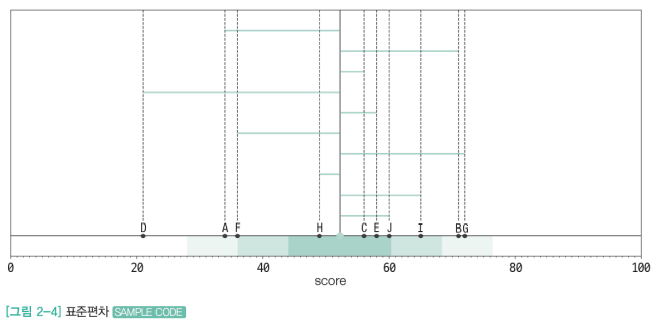
- 중앙의 가로선과 세로선은 4명의 평균점수
- A, B, C, D 각각은 시험 점수
- 각 회색의 정사각형이 편차 제곱
- 정사각형의 평균이 중앙의 정사각형
- 중앙 정사각형의 면적이 분산

#### 표준편차
- 앞의 예에서 분산은 점수의 제곱
- 영어 점수의 분산은 86점2
- 원래의 데이터와 동일한 단위를 쓰는 산포도 지표가 필요
- 분산에 제곱근을 취한 것이 표준편차
$$
S=\sqrt{S^2}=\sqrt{\frac{1}{n}\sum_{i=1}^{n}{(x_i-\bar{x})^2}}
$$

- 원래 데이터와 동일한 단위이므로 동일 차원으로 그릴 수 있음
- 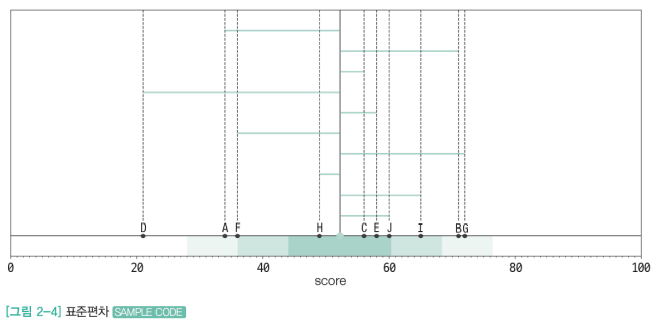
- 평균$\pm$표준편차, 평균$\pm$2표준편차, 평균$\pm$3표준편차
- 1시그마 구간, 2시그마 구간, 3시그마 구간

In [ ]:
print('scores : {}'.format(scores))

# ddof=0 표본분산, ddof=1 불편분산

# 방법1
print('np.sqrt(np.var(scores, ddof=0)) : {}'.format(np.sqrt(np.var(scores, ddof=0))))
# 방법2
std = np.std(scores, ddof=0)
print('np.std(scores, ddof=0)          : {}'.format(std))

### 범위와 사분위 범위 --- p.32~34
#### 범위 --- p.32
- 데이터 전체가 아니라 최댓값과 최솟값만으로 산포도 표현
$$
R_g=x_{max} - x_{min}
$$

In [ ]:
rg = np.max(scores) - np.min(scores)

print('np.max(scores) : {}'.format(np.max(scores)))
print('np.min(scores) : {}'.format(np.min(scores)))
print('rg : {}'.format(rg))

#### 사분위 범위 --- p.33
- 상위수%와 하위수%에 위치하는 값의 차이
- 데이터의 하위 25%, 50%, 75%에 위치하는 값은 각각 제1사분위수(Q1), 제2사분위수(Q2), 제3사분위수(Q3)
- 사분위 범위 $IQR = Q3 - Q1$
- 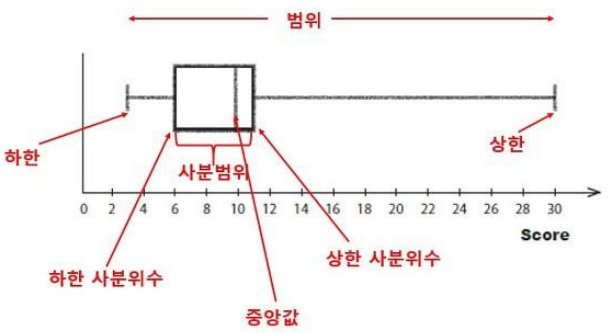

In [ ]:
scores_Q1 = np.percentile(scores, 25)
print('scores_Q1 : {}'.format(scores_Q1))

scores_Q3 = np.percentile(scores, 75)
print('scores_Q3 : {}'.format(scores_Q3))

scores_IQR = scores_Q3 - scores_Q1
print('scores_IQR : {}'.format(scores_IQR))

### 데이터 지표 정리 --- p.35

In [ ]:
#### 데이터 지표 정리 --- p.35
pd.Series(scores).describe()

### 표준화 --- p.36

- 상대적 결과가 다르므로 통일된 지표로 변환하는 정규화
- 데이터에서 평균을 빼고 표준편차로 나누는 작업
- 표준화된 데이터는 표준화 변량 혹은 Z 점수
$$
Z_i = \frac{x_i - \bar{x}}{S}
$$

In [ ]:
print('scores : {}'.format(scores))

print('mean : {}'.format(mean)) # mean = np.mean(scores)
print('std  : {}'.format(std)) # std = np.std(scores, ddof=0)
print('-'*50)

z = (scores - mean) / std
print('z : {}'.format(z))

표준화된 데이터는 평균이 0, 표준편차가 1
- $Z(0,1)$

In [ ]:
np.mean(z), np.std(z,ddof=0)

#### 편차값 --- p.37
- 평균이 50, 표준편차가 10이 되도록 정규화한 값
$$
Z_i = 50 + 10 \times \frac{x_i - \bar{x}}{S}
$$

In [ ]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

In [ ]:
# 점수와 편찻값의 관계 --- p.38
display(scores_df.head())

scores_df['deviation value'] = z
display(scores_df.head())
print('-> 어떤 학생이 평균 성적을 얻었고, 어떤 학생이 우수한 성적을 얻었는지 알 수 있음')

### 도수분포표 --- p.39

In [ ]:
scores_df

In [ ]:
# 50명의 영어점수 array
english_scores = np.array(df['english'])
english_scores

In [ ]:
# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

- 데이터의 분포 상태를 세부적으로 알고 싶을 때, 데이터가 취하는 값을 몇 개의 구간으로 나누고, 각 구간에 몇 개의 데이터가 들어가는가를 세는 방법
- 분할된 구간과 데이터의 개수를 정리한 표가 도수분포표
    - 계급: 시험 점수를 10점 간격으로 나눌 때 0~10점 구간 등
    - 도수: 각 계급에 속한 학생 수
    - 계급폭: 각 구간의 폭, 10점
    - 계급수: 계급의 수, 10

In [ ]:
freq, _ = np.histogram(english_scores, bins=10, range=(0,100))
print(freq)
# print('1줄은 값, 2줄은 구간')

In [ ]:
# p.42
[ f'{i}' for i in range(0,100,10) ]

In [ ]:
# 0~10, 10~20, ... 이라는 문자열 리스트를 작성
freq_class = [ f'{i}~{i+10}' for i in range(0,100,10) ]
freq_class

In [ ]:
# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq},
                           index=pd.Index(freq_class, 
                                          name='class') )
freq_dist_df

#### 계급값 --- p.43
- 각 계급을 대표하는 값으로, 계급의 중앙값을 이용

In [ ]:
class_value = [( i + (i+10) )//2 for i in range(0,100,10)]
class_value

### 도수분포표 --- p.44~47
#### 상대도수 --- p.44
- 전체 데이터에 대해서 해당 계급의 데이터가 차지하는 비율

In [ ]:
# freq.sum()

rel_freq = freq / freq.sum()
rel_freq

#### 누적상대도수 --- p.45
- 해당 계급까지의 상대도수의 합

In [ ]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

In [ ]:
# 계급값을 도수분포표에 추가
print('class_value : {}'.format(class_value))
freq_dist_df['class value'] = class_value
freq_dist_df

In [ ]:
# 상대도수를 도수분포표에 추가
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df

In [ ]:
# 누적상대도수를 도수분포표에 추가
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df

In [ ]:
freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]
freq_dist_df

#### 최빈값 --- p.47
- 최대가 되는 계급의 계급값

In [ ]:
display(freq_dist_df.head())

print("freq_dist_df['frequency']\n", freq_dist_df['frequency'], '\n')
print("freq_dist_df['frequency'].max() : {}".format(freq_dist_df['frequency'].max()))
print("freq_dist_df['frequency'].idxmax() : {}".format(freq_dist_df['frequency'].idxmax()))
print("freq_dist_df.loc['60~70', 'class value'] : {}".format(freq_dist_df.loc['60~70', 'class value']))
print("freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value'] : {}".format(freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']))

### 히스토그램 --- p.48~51

In [ ]:
print('english_scores : {}'.format(english_scores))
print('type(english_scores) : {}'.format(type(english_scores)))

In [ ]:
#import matplotlib.pyplot as plt

# 캔버스를 생성
# figsize로 가로, 세로 크기를 지정
fig = plt.figure(figsize=(10,6))
# 캔버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1X1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
# freq, a, b = ax.hist(english_scores, bins=25, range=(0,100))
# freq, a, b

# X축에 레이블 부여
ax.set_xlabel(' score ')
# Y축에 레이블 부여
ax.set_ylabel(' person number ')

# X축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0,100,25+1)) # arange범위에 안 들어가서 +1해줌
# Y축을 0, 10, 20, ...의 눈금으로 구분
ax.set_yticks(np.arange(0,freq.max()+1)) # arange범위에 안 들어가서 +1해줌

# 그래프 표시
plt.show()

계급수를 25, 즉 계급폭을 4점으로 하는 히스토그램을 누적 상대도수의 꺾은선
그래프와 함께 그림

In [ ]:
print('np.ones_like(english_scores) : {}'.format(np.ones_like(english_scores)))
print('len(english_scores) : {}'.format(len(english_scores)))
print('weights : {}'.format(weights))
print('class_value : {}'.format(class_value))


In [ ]:
'''
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그람
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')
# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()
'''

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에서 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
# 이것을 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores) / len(english_scores)
req_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0,100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i + (i+4)) // 2 for i in range(0, 100, 4) ]
# 꺾은선 그래프를 그림
# 인수 ls를 '--'로 하면 점선이 그려짐
# 인수 marker를 'o'으로 하면 데이터 점을 그림
# 인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,
         ls='--', marker='o', color='gray')
# 꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks( np.linspace(0, 100, 25+1) )

plt.show()
# print('weights : {}'.format(weights))

In [ ]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111) # (1,1,1)과 동일
ax.boxplot(english_scores, labels=['english'])

plt.show()

# 2차원 데이터 --- p.54

In [ ]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')
df.head()

In [ ]:
# p.54
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                      name='student'))
scores_df

In [61]:
scores_df['mathematics'].mean()

71.400

In [62]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [63]:
np.var(ma_scores)

68.44000000000001

In [64]:
np.cov(en_scores, ma_scores, ddof=0)[0,1] / (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

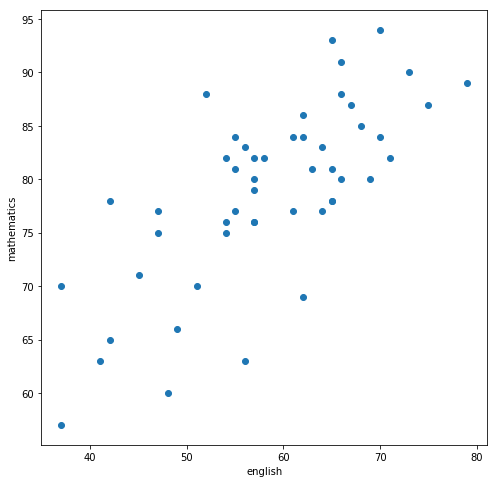

In [65]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

In [66]:
poly_fit = np.polyfit(english_scores, math_scores, 1)
poly_fit

array([ 0.621, 42.601])

In [67]:
poly_1d = np.poly1d(poly_fit)
poly_1d

poly1d([ 0.621, 42.601])

In [68]:
xs = np.linspace(english_scores.min(), english_scores.max())
xs

array([37.   , 37.857, 38.714, 39.571, 40.429, 41.286, 42.143, 43.   ,
       43.857, 44.714, 45.571, 46.429, 47.286, 48.143, 49.   , 49.857,
       50.714, 51.571, 52.429, 53.286, 54.143, 55.   , 55.857, 56.714,
       57.571, 58.429, 59.286, 60.143, 61.   , 61.857, 62.714, 63.571,
       64.429, 65.286, 66.143, 67.   , 67.857, 68.714, 69.571, 70.429,
       71.286, 72.143, 73.   , 73.857, 74.714, 75.571, 76.429, 77.286,
       78.143, 79.   ])

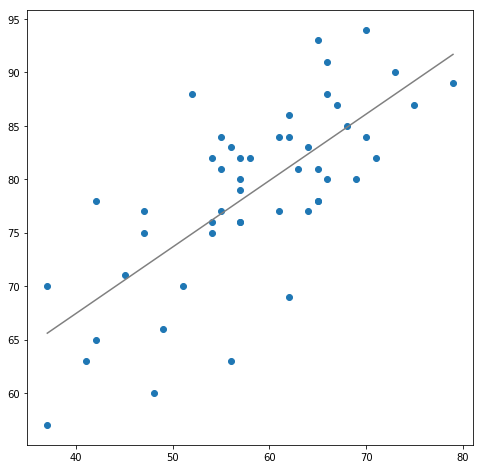

In [69]:
ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label = 'score')
ax.plot(xs, ys, color='gray',
       label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

plt.show()

## 히트맵 --- p.67

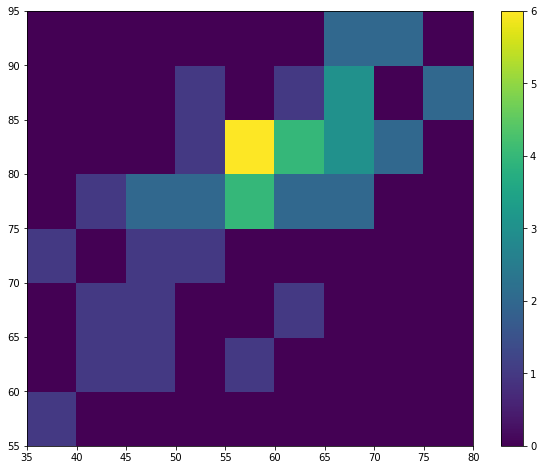

In [70]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores, bins=[9,8], range=[(35,80), (55,95)])

ax.set_label('english')
ax.set_label('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)

plt.show()

In [71]:
anscombe_data = np.load('data/ch3_anscombe.npy')
print(anscombe_data.shape)
print('-'*50)
print(anscombe_data)

(4, 11, 2)
--------------------------------------------------
[[[10.    8.04]
  [ 8.    6.95]
  [13.    7.58]
  [ 9.    8.81]
  [11.    8.33]
  [14.    9.96]
  [ 6.    7.24]
  [ 4.    4.26]
  [12.   10.84]
  [ 7.    4.82]
  [ 5.    5.68]]

 [[10.    9.14]
  [ 8.    8.14]
  [13.    8.74]
  [ 9.    8.77]
  [11.    9.26]
  [14.    8.1 ]
  [ 6.    6.13]
  [ 4.    3.1 ]
  [12.    9.13]
  [ 7.    7.26]
  [ 5.    4.74]]

 [[10.    7.46]
  [ 8.    6.77]
  [13.   12.74]
  [ 9.    7.11]
  [11.    7.81]
  [14.    8.84]
  [ 6.    6.08]
  [ 4.    5.39]
  [12.    8.15]
  [ 7.    6.42]
  [ 5.    5.73]]

 [[ 8.    6.58]
  [ 8.    5.76]
  [ 8.    7.71]
  [ 8.    8.84]
  [ 8.    8.47]
  [ 8.    7.04]
  [ 8.    5.25]
  [19.   12.5 ]
  [ 8.    5.56]
  [ 8.    7.91]
  [ 8.    6.89]]]


In [72]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean', 'Y_variance',
                              'X&Y_correlation', 'X&Y_regression line'])
print(stats_df)

for i ,data in enumerate(anscombe_data):
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] = [ f'{np.mean(dataX):.2f}',
                               f'{np.var(dataX):.2f}',
                               f'{np.mean(dataY):.2f}',
                               f'{np.var(dataY):.2f}',
                               f'{np.corrcoef(dataX, dataY)[0,1]:.2f}',
                               f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x']
stats_df

Empty DataFrame
Columns: []
Index: [X_mean, X_variance, Y_mean, Y_variance, X&Y_correlation, X&Y_regression line]


,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x


TypeError: slice indices must be integers or None or have an __index__ method

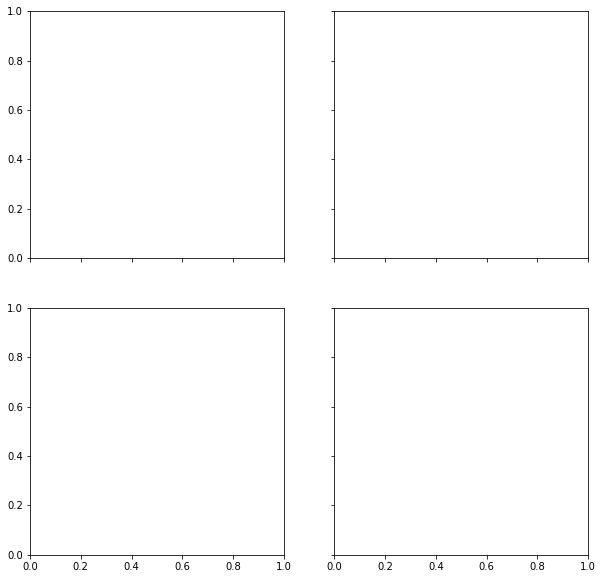

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10),
                        sharex=True, sharey=True)

xs=np.linspace(0,30,100)

for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:.0], data[:,1],1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)

plt.show()

In [ ]:
np.linspace(0,30,100)

In [ ]:
#2021-11-23

# 추측 통계의 기본 --- p. 71

In [74]:
df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

## 표본추출 방법 --- p.75

- 무작위 추출(임의 추출): 임의로 표본을 추출하는 방법

In [75]:
# 복원추출: 여러 차례 동일한 표본을 선택하는 방법
np.random.choice([1,2,3],3) # 복원추출

array([2, 3, 3])

In [76]:
# 비복원추출: 동일한 표본은 한 번만 선택하는 방법

np.random.choice([1,2,3,4,5,6], 3, replace=False) # 비복원추출

array([5, 2, 6])

In [77]:
# 시드를 0으로 하는 무작위 추출(임의 추출)은 매번 동일한 결과

np.random.seed(0) # 시드 0으로 해 같은 결과 나오게 하는 무작위 추출
print(np.random.choice([1,2,3],3))
print(np.random.choice([1,2,3],3))
print(np.random.choice([1,2,3],3))

[1 2 1]
[2 2 3]
[1 3 1]


In [78]:
# 표본크기 20으로 복원추출, 표본 평균 계산

scores.shape
np.random.seed(0)
sample = np.random.choice(scores, 20)

print('sample.mean() :',sample.mean(),'scores.mean() :', scores.mean())
print(' -> 모평균은 69.530(score.mean())이므로 꽤 괜찮은 추측')

sample.mean() : 70.4 scores.mean() : 69.53
 -> 모평균은 69.530(score.mean())이므로 꽤 괜찮은 추측


In [79]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위추출로 얻은 표본평균', sample.mean())

1번째 무작위추출로 얻은 표본평균 72.45
2번째 무작위추출로 얻은 표본평균 63.7
3번째 무작위추출로 얻은 표본평균 66.05
4번째 무작위추출로 얻은 표본평균 71.7
5번째 무작위추출로 얻은 표본평균 74.15


## 확률의 기본 --- p.79

In [80]:
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [81]:
num_trial = 100
sample = np.random.choice(dice,num_trial,p=prob)
sample

array([1, 4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4,
       5, 3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4,
       6, 5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3,
       2, 2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4,
       2, 4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3])

In [82]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency':freq,
             'relative frequency':freq / num_trial},
            index=pd.Index(np.arange(1,7), name='dice'))

,frequency,relative frequency
dice,,
1,6,0.06
2,9,0.09
3,13,0.13
4,26,0.26
5,19,0.19
6,27,0.27


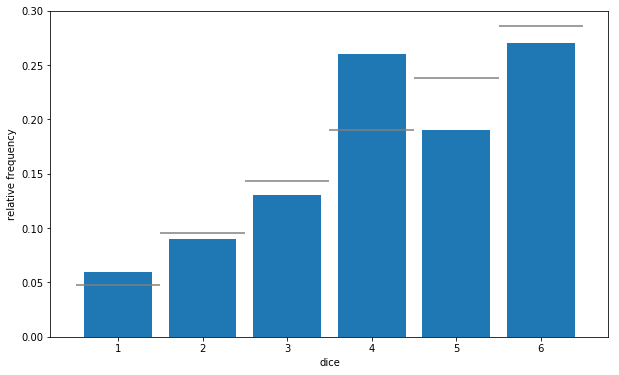

In [83]:
# 그림4-2 100번 시행했을 때 주사위 눈에 대한 히스토그램

#import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')

ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1,7))

ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

C:\Users\0114m\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


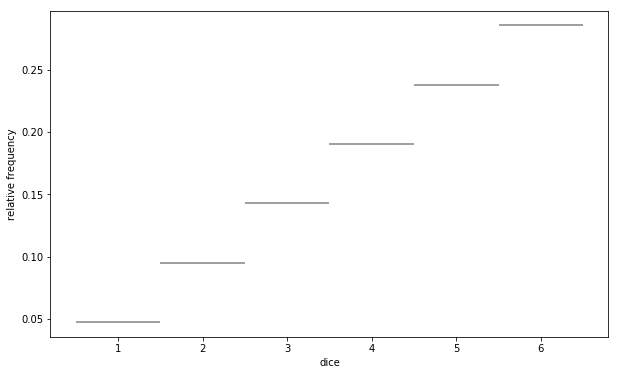

In [84]:
# 그림4-3 10000번 시행했을 때 주사위 눈에 대한 히스토그램

sample = np.random.choice(scores, 10000)

fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')

ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1,7))

ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

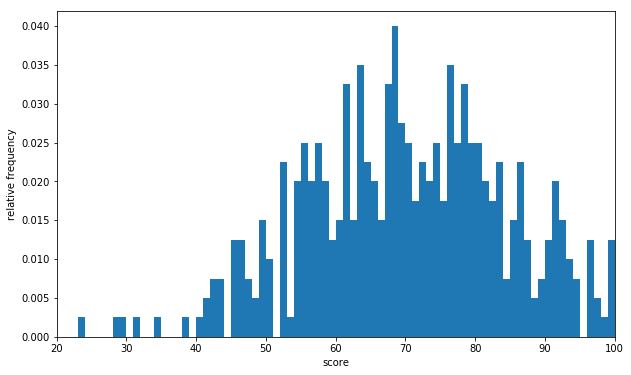

 -> 69점을 얻은 학생은 전교생의 0.04(4%)이므로 무작위추출을 수행하면 4%의 확률로 69점이라는 표본 데이터 획득


In [85]:
# 계급폭을 1점으로 하는 히스토그램 --- p.85~86

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0,100), density=True)
ax.set_xlim(20,100)
ax.set_ylim(0,0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

print(' -> 69점을 얻은 학생은 전교생의 0.04(4%)이므로 무작위추출을 수행하면 4%의 확률로 69점이라는 표본 데이터 획득')

In [86]:
np.random.choice(scores)

85

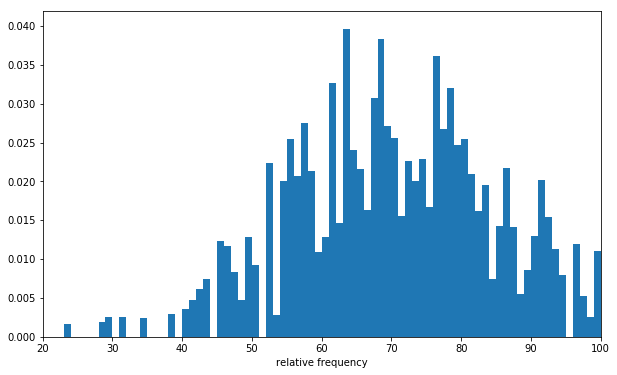

In [87]:
#p.88~89
sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0,100), density=True)
ax.set_xlim(20,100)
ax.set_ylim(0,0.042)
ax.set_xlabel('score')
ax.set_xlabel('relative frequency')
plt.show()

표본크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행


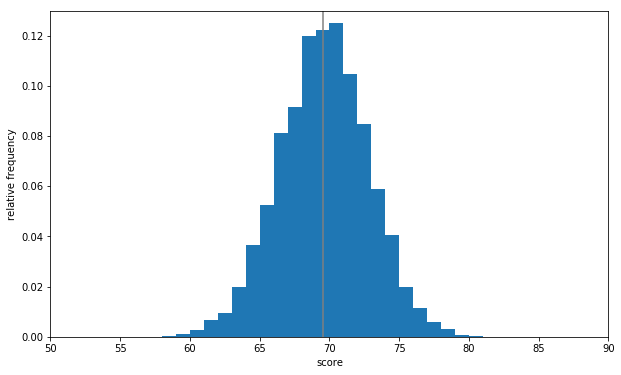

표본평균은 모평균을 중심으로 분포 
 => 무작위추출에 의한 표본평균으로 모평균 추측 가능


In [88]:
# 그림4-6 표본평균의 분포 --- p.90~91

print('표본크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행')

sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0,100), density=True)

ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50,90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

print('표본평균은 모평균을 중심으로 분포','\n','=> 무작위추출에 의한 표본평균으로 모평균 추측 가능')


# 확률통계_2.pdf

## 이산형 확률변수 --- p.1

### 1차원 이산형 확률변수의 정의 --- p.3

In [89]:
x_set = np.array([1,2,3,4,5,6])

In [90]:
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [91]:
X = [x_set, f]

In [92]:
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

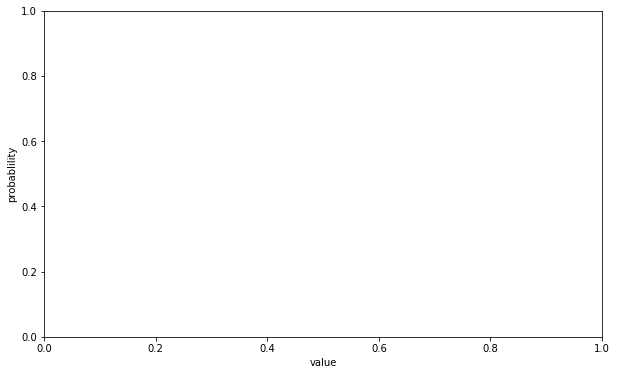

In [93]:
# 5-1 확률분포 --- p.6
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.set_xlabel('value')
ax.set_ylabel('probablility')

plt.show()

In [94]:
np.all(prob>=0) #  np.all은 모든 요소가 참일 때만 참을 반환

True

In [95]:
np.sum(prob)

0.9999999999999999

In [96]:
lst = np.array([1,2,3,4,5,0]) # 0 때문에 False
np.all(lst)

False

In [97]:
# 누적분포함수(분포함수) 𝐹(𝑥) : 𝑋가 𝑥 이하가 될 때의 확률을 반환하는 함수 --- p.8

def F(x):
    return np.sum( [f(x_k) for x_k in x_set if x_k <= x])

F(3) # 눈이 3 이하가 되는 확률

0.2857142857142857

In [98]:
# 확률변수 𝑋에 2를 곱하고 3을 더한 2𝑋 + 3도 확률변수(2𝑋+3 = Y) --- p.9 

y_set = np.array([ 2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [99]:
# 불공정한 주사위의 기댓값 --- p.10

np.sum( [x_k * f(x_k) for x_k in x_set] )

4.333333333333333

In [100]:
#  주사위를 100만(10^6)번 굴린 실현값의 평균 --- p.11

sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.33384

In [101]:
def E(X, g=lambda x: x):
    x_set, f= X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

X

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

In [102]:
2*E(X) + 3

11.666666666666666

In [103]:
E(X)

4.333333333333333

In [104]:
# 분산 --- p.15

mean = E(X)
np.sum( [ (x_k - mean)**2 * f(x_k) for x_k in x_set ] )

2.2222222222222223

In [105]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X,g)
    return np.sum( [(g(x_k) - mean)**2 * f(x_k) for x_k in x_set] )

V(X)

2.2222222222222223

In [106]:
print('X나 Y나 분산은 똑같다')

X나 Y나 분산은 똑같다


In [107]:
V(X, g=lambda x:2*x + 3)

8.88888888888889

In [108]:
# V(2X+4) = 2**2V(X)
2**2*V(X)

8.88888888888889

### 2차원 이산형 확률변수의 정의 --- p.18

In [109]:
# 𝑋와 𝑌가 취할 수 있는 값의 집합 --- p.21

x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [110]:
# 결합확률함수

def f_XY(x,y):
    if 1 <= y <= 6 and 1 <= x-y <= 6:
        return y*(x-y) / 441
    else:
        return 0

In [111]:
%precision 3
pd.set_option('display.precision',3)

In [112]:
XY = [x_set, y_set, f_XY]

[[0.002 0.    0.    0.    0.    0.   ]
 [0.005 0.005 0.    0.    0.    0.   ]
 [0.007 0.009 0.007 0.    0.    0.   ]
 [0.009 0.014 0.014 0.009 0.    0.   ]
 [0.011 0.018 0.02  0.018 0.011 0.   ]
 [0.014 0.023 0.027 0.027 0.023 0.014]
 [0.    0.027 0.034 0.036 0.034 0.027]
 [0.    0.    0.041 0.045 0.045 0.041]
 [0.    0.    0.    0.054 0.057 0.054]
 [0.    0.    0.    0.    0.068 0.068]
 [0.    0.    0.    0.    0.    0.082]]
--------------------------------------------------------------------------------


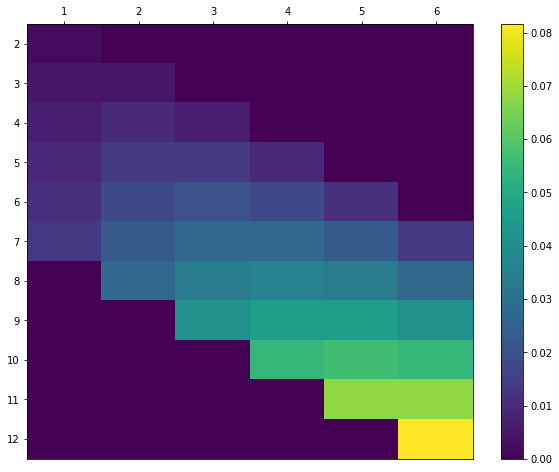

In [113]:
# 확률분포의 히트맵 --- p.22~23

# 표5-2(p.19)에 있는 값 prob로 세팅
prob = np.array([ [f_XY(x_i, y_j) for y_j in y_set]
                for x_i in x_set])
print(prob)
print('-'*80)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor = False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor = False)
ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)

ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c,ax=ax)
plt.show()

In [114]:
#[ [(i,j) for j in range(3)] for i in range(10)]
print(prob.shape)
print(prob.shape[0])
print(prob.shape[1])

(11, 6)
11
6


In [115]:
# 주변확률분포
'''
확률변수 (𝑋, 𝑌)는 결합확률분포에 의해 동시에 정의되지만, 확률변수 𝑋의 확률함수 𝑓𝑋(𝑥)를 알고 싶을 때
- 𝑓𝑋𝑌에서 𝑌가 취할 수 있는 값 모두를 대입한 다음 모두 더한 𝑓𝑋 𝑥 = σ𝑘 𝑓𝑋𝑌(𝑥, 𝑦𝑘)
'''
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

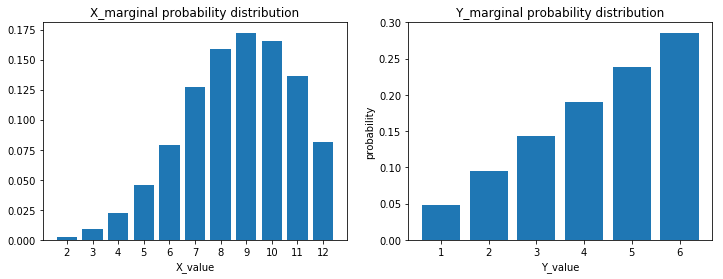

In [116]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [117]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [118]:
# 기대값 --- p.29~30

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum( [g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set ])

mean_X = E(XY, lambda x,y: x)
print('mean_X :',mean_X)

mean_Y = E(XY, lambda x,y: y)
print('mean_Y :',mean_Y)

mean_X : 8.666666666666666
mean_Y : 4.333333333333333


In [119]:
a,b=2,3
a,b

(2, 3)

In [120]:
E(XY, lambda x,y: a*x + b*y)

30.333333333333332

In [121]:
a*mean_X + b*mean_Y # 2 x 8.667 + 3 x 4.333

30.333333333333332

In [122]:
# 분산 --- p.32

np.sum([( x_i - mean_X )**2 * f_XY(x_i, y_j)
       for x_i in x_set for y_j in y_set])

4.444444444444444

In [123]:
XY

[array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([1, 2, 3, 4, 5, 6]),
 <function __main__.f_XY(x, y)>]

In [124]:
# X와 Y의 함수 g(X, Y)의 분산
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j) - mean)**2 * f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set])

In [125]:
# X의 분산
var_X = V(XY, g=lambda x, y: x)
var_X

4.444444444444444

In [126]:
# Y의 분산
var_Y = V(XY, g=lambda x, y:y)
var_Y

2.2222222222222223

In [127]:
# 공분산 --- p.35
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i - mean_X) * (y_j - mean_Y) *f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set])

In [128]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

In [129]:
V(XY, lambda x, y: a*x + b*y)

64.44444444444444

In [130]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.44444444444443

In [131]:
# 상관계수 --- p.37

cov_xy / np.sqrt(var_X * var_Y)

0.7071067811865474

## 이산형 확률분포 --- p.38

In [132]:
# p.40

linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean )**2 * f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance{(V(X)):.4}')
    
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()

### 베르누이 분포 --- p.43

In [133]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f

In [134]:
# X ~ Bern(0.3)
p = 0.3
X = Bern(p)
X

(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

In [135]:
check_prob(X)

expected value 0.3
variance0.21


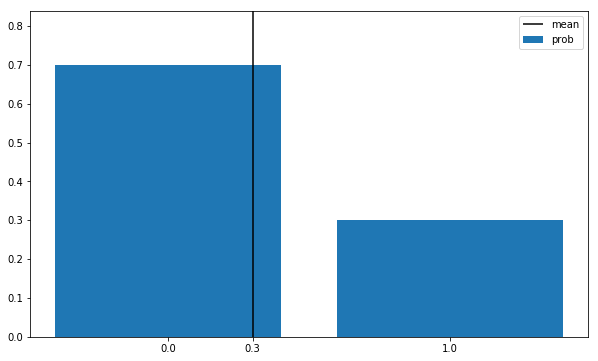

In [136]:
plot_prob(X)

In [137]:
# scipy.stats의 bernoulli 함수는 베르누이 분포를 따르는 확률변수를 생성
rv = stats.bernoulli(p)

In [138]:
print(dir(rv))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'a', 'args', 'b', 'cdf', 'dist', 'entropy', 'expect', 'interval', 'isf', 'kwds', 'logcdf', 'logpdf', 'logpmf', 'logsf', 'mean', 'median', 'moment', 'pdf', 'pmf', 'ppf', 'random_state', 'rvs', 'sf', 'stats', 'std', 'var']


In [139]:
# pmf 메서드는 확률함수 계산
rv.pmf(0), rv.pmf(1) # 확률질량함수 probability mass function, PMF

(0.7000000000000001, 0.3)

In [140]:
# cdf 메서드는 누적밀도함수 계산
rv.cdf([0,1]) # 누적 분포 함수 Cumulative distribution function, CDF

array([0.7, 1. ])

In [141]:
rv.mean(), rv.var()

(0.3, 0.21)

### 이항분포 --- p.47

In [142]:
from scipy.special import comb

def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x) * p ** x * (1-p) ** (n-x)
        else:
            return 0
    return x_set, f

In [143]:
# X ~ Bin(10, 0.3)
n = 10
p = 0.3
X = Bin(n,p)

In [144]:
check_prob(X)

expected value 3.0
variance2.1


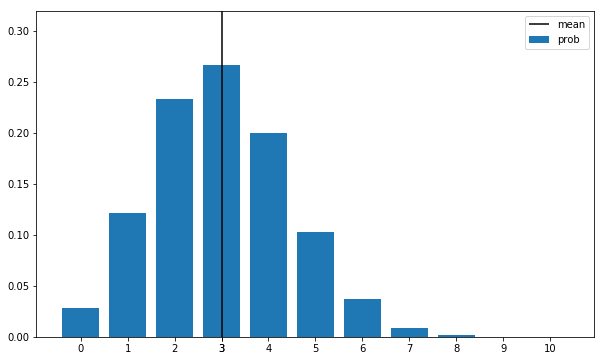

In [145]:
plot_prob(X)

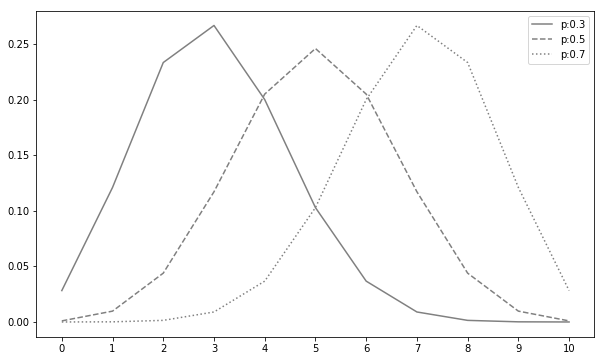

In [146]:
# scipy.stats의 binom 함수는 이항분포를 따르는 확률변수를 생성

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(n+1)
for p,ls in zip([0.3,0.5,0.7], linestyles):
    rv = stats.binom(n,p)
    ax.plot(x_set, rv.pmf(x_set), label=f'p:{p}', ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()

In [147]:
x_set = np.arange(11)
rv = stats.binom(10,0,3) # (n,p)
rv.pmf(x_set)
rv.pmf([0,1]) # [실패확률, 성공확률]

array([0., 0.])

### 기하분포 --- p.54

- 베르누이 시행에서 처음 성공할 때까지 반복한 시행 횟수가 따르는 분포
- 파라미터 𝑝인 기하분포는 Ge(𝑝)

In [148]:
# 기하분포의 기대값과 분산 E(X) = 1 / p, V(X) = (1-p) / p^2
def Ge(p):
    x_set = np.arange(1,30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [149]:
# X ~ Ge(1/2)
# ex) 동전을 다섯 번째 던져 처음으로 앞면(1/2)이 나오는 확률

p = 0.5
X = Ge(p)

In [150]:
check_prob(X)

expected value 2.0
variance2.0


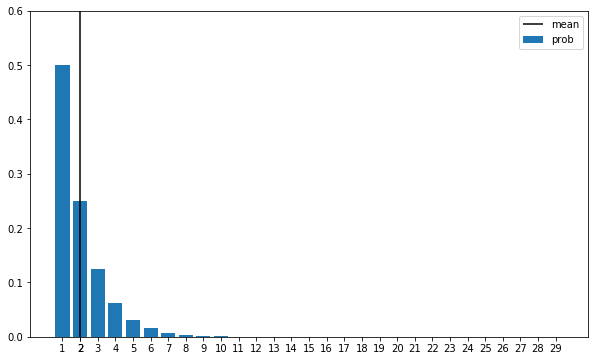

In [151]:
plot_prob(X)

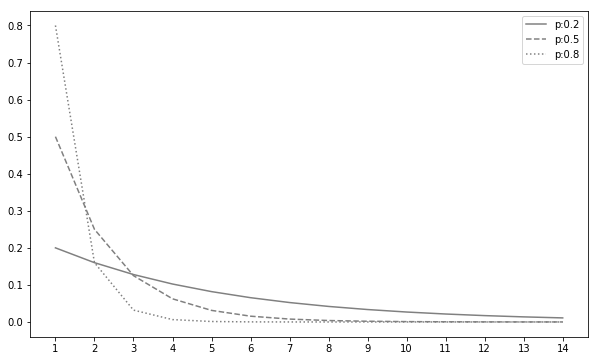

In [152]:
# 그림 6-5 다양한 기하분포 --- p.58~59

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(1,15)
for p,ls in zip([0.2,0.5,0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
           label=f'p:{p}', ls=ls, color='gray')
    ax.set_xticks(x_set)
    ax.legend()
    
plt.show()

#print('동전을 던져서 처음 앞 면이 나올 확률이 높을 수록 ')

### 포아송 분포 --- p.61

- 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률분포
- 파라미터 λ인 포아송 분포는 Poi(λ)
- Poi(λ)는 단위 시간당 평균 λ번 발생하는 임의의 사건이 단위 시간에 발생하는 건수가 따르는 분포
- ex) 하루에 평균 2건의 교통사고가 발생(Poi(2))하는 지역에서 하루에 교통사고가 한 건도 일어나지 않을 확률


In [153]:
# 포아송 분포의 기대값과 분산 E(X) = λ, V(X) = λ

from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [154]:
# X ~ Poi(3)
lam = 3
X = Poi(lam)

In [155]:
print(check_prob(X))
print('기댓값과 분산은 모두 3')

expected value 3.0
variance3.0
None
기댓값과 분산은 모두 3


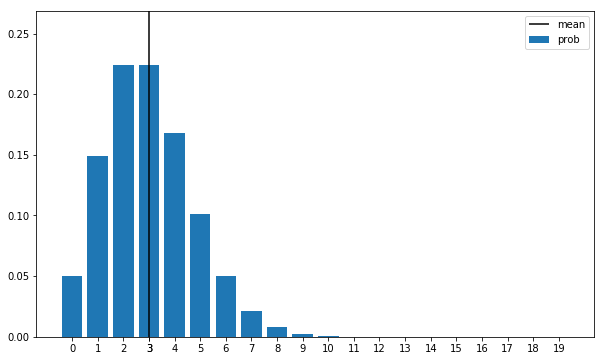

In [156]:
plot_prob(X)

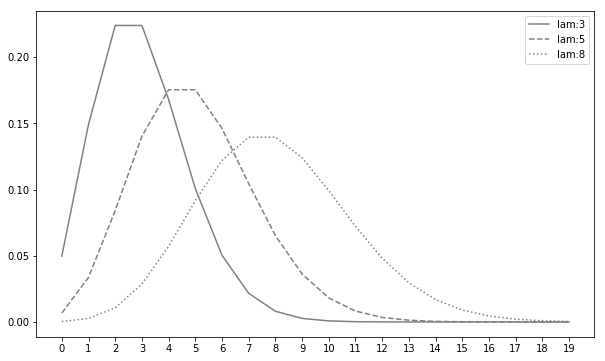

In [157]:
# 그림 6-7 다양한 포아송 분포 --- p. 65~66

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3,5,8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
           label=f'lam:{lam}', ls=ls, color='gray')

ax.set_xticks(x_set)
ax.legend()
    
plt.show()

# 확률통계_3.pdf

## 연속형 확률변수 --- p.1

- 확률변수가 취할 수 있는 값이 연속적인 확률변수
- 특정 값을 취하는 확률은 정의되지 않음
- 확률변수가 어느 구간에 들어가는 확률을 정의

- [예] 룰렛:
- 취할 수 있는 값이 0부터 1사이의 실수
- 큰 수일수록 나오기 쉬워지는 불공정한 구조
- 0.5라는 값을 취할 확률은 0
- 정확하게 0.5000000⋯을 취할 가능성은 없으므로 확률은 0


In [158]:
from scipy import integrate
import warnings

warnings.filterwarnings('ignore', category=integrate.IntegrationWarning)

### 1차원 연속형 확률변수 ---p.4

= 확률밀도함수
- 확률변수가 취할 수 있는 값은 구간 [a, b]
- 확률은 확률밀도함수(PDF) 또는 밀도함수 𝑓(𝑥)에 의해 정의
- 어떤 특정 값을 취하는 확률로는 정의되지 않음
- 𝑓(𝑥) ≠ 𝑃(𝑋 = 𝑥)

In [159]:
x_range = np.array([0,1])

def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2*x
    else:
        return 0

In [160]:
X = [x_range, f]

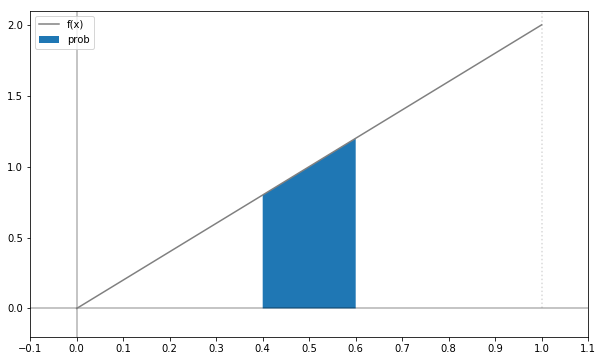

In [161]:
# 그림 7-2 불공정한 룰렛에 대한 밀도함수와 확률 p.6~7

xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color= 'gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3) # 
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', alpha=0.3, color='gray')

xs = np.linspace(0.4, 0.6, 100)

ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [162]:
integrate.quad(f, 0.4, 0.6) # integrate.quad(피적분함수, 적분범위, 적분범위)

(0.200, 0.000)

In [163]:
from scipy.optimize import minimize_scalar
res = minimize_scalar(f)
res.fun

0

In [164]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [165]:
F(0.6) - F(0.4)

0.200

In [166]:
X

[array([0, 1]), <function __main__.f(x)>]

In [167]:
# 불공정한 룰렛의 기댓값 --- p.18
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [168]:
def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [169]:
X

[array([0, 1]), <function __main__.f(x)>]

In [170]:
# 𝑋 의 기댓값
E(X)

0.667

In [171]:
# 𝑌 = 2𝑋 + 3의 기댓값
print(E(X, g=lambda x: 2*x + 3))
print(2 * E(X) + 3)
print('연속형 확률변수도 기댓값의 선형성 성립 | E(2X+3) = 2E(X)+3')

4.333333333333334
4.333333333333333
연속형 확률변수도 기댓값의 선형성 성립 | E(2X+3) = 2E(X)+3


In [172]:
# 불공정한 룰렛의 분산
mean = E(X)
def integrand(x):
    return (x-mean) ** 2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [173]:
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [174]:
# 𝑋 의 분산
V(X)

0.056

In [175]:
# 𝑌 = 2𝑋 + 3의 분산
2**2*V(X)

0.222

### 2차원 연속형 확률변수 ---p.26
= 결합확률밀도함수


= 결합확률밀도함수
- 2차원 연속형 확률변수 (𝑋, 𝑌)는 {(x,y) | a <= x <= b; c <= y <= d}와 f(x,y)에 의해 정의
- f(x,y)는 결합확률밀도함수
- 예: 불공정한 룰렛 𝐴, 𝐵
- 𝐴와 𝐵를 더한 것이 𝑋, 𝐴를 𝑌로 한 2차원 확률변수 (𝑋, 𝑌)

In [178]:
x_range = [0,2]
y_range = [0,1]

def f_xy(x,y):
    if 0 <= y <= 1 and 0 <= x-y <= 1:
        return 4 * y * (x-y)
    else:
        return 0
    
XY = [x_range, y_range, f_xy]

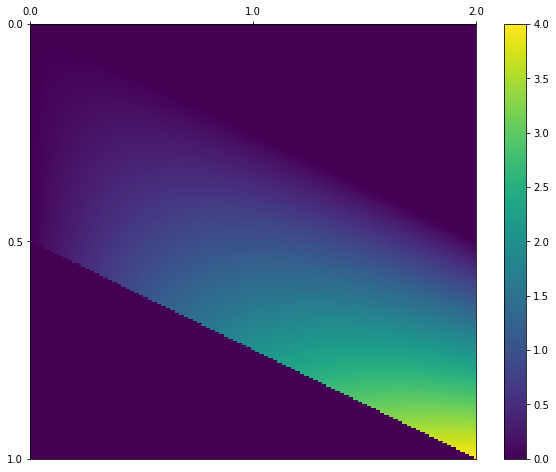

In [179]:
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([ [f_xy(x,y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0,200,3), minor=False)
ax.set_yticks(np.linspace(0,200,3), minor=False)
ax.set_xticklabels(np.linspace(0,2,3))
ax.set_yticklabels(np.linspace(0,1,3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [181]:
integrate.nquad(f_xy,
               [[-np.inf, np.inf],
                [-np.inf, np.inf]])[0]

1.326

= 주변확률밀도함수
- 확률변수 𝑋만의 움직임

In [183]:
from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

X = [x_range, f_X]
Y = [y_range, f_Y]

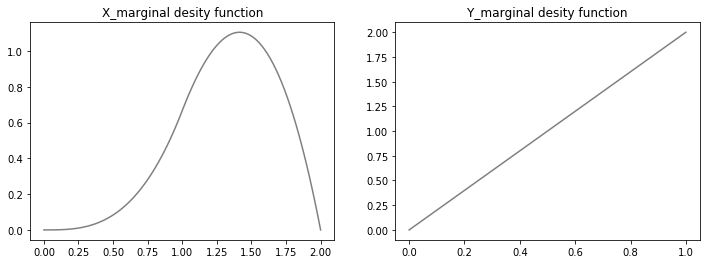

In [184]:
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(xs, [f_X(x) for x in xs], color = 'gray')
ax2.plot(ys, [f_Y(y) for y in ys], color = 'gray')

ax1.set_title('X_marginal desity function')
ax2.set_title('Y_marginal desity function')

plt.show()

In [185]:
# 기대값
def integrand(x,y):
    return x * f_xy(x,y)

integrate.nquad(integrand,
               [[-np.inf, np.inf],
                [-np.inf, np.inf]])[0]

0.863

In [186]:
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x,y):
        return g(x,y) * f_xy(x,y)
    
    return integrate.nquad(integrand,
                          [[-np.inf, np.inf],
                           [-np.inf, np.inf]])[0]

In [189]:
# 𝑋와 𝑌의 기댓값

mean_X = E(XY, lambda x, y: x)
print(mean_X)

mean_Y = E(XY, lambda x, y: y)
print(mean_Y)

0.8632973010895779
7.660605260889785e-05


In [191]:
# 기댓값의 선형성 𝐸 2𝑋 + 3𝑌 = 2𝐸 𝑋 + 3𝐸(𝑌)
a,b=2,3
print(E(XY, lambda x, y:a*x +b*y))
print(a * mean_X + b * mean_Y)

4.748763067387628
1.7268244203369825


In [192]:
# 분산
def integrand(x,y):
    return (x - mean_X) ** 2 * f_xy(x,y)

integrate.nquad(integrand,
               [[-np.inf, np.inf],
                [-np.inf, np.inf]])[0]

0.006

In [197]:
# 𝑔(𝑋, 𝑌) 의 분산
def V(XY, g):
    x_range, y_range, f_xy = XY
    mean = E(XY, g)
    def integrand(x,y):
        return ( g(x,y) - mean ) ** 2 * f_xy(x,y)
    
    return integrate.nquad(integrand,
                          [[-np.inf, np.inf],
                           [-np.inf, np.inf]])[0]

In [199]:
# X와 Y의 분산
var_X = V(XY, lambda x, y: x)
print(var_X)

var_Y = V(XY, lambda x, y: y)
print(var_Y)

0.006257177583052878
1.6887826975941078


In [200]:
# 공분산 - 두 확률변수 𝑋, 𝑌 사이의 상관
def Cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    def integrand(x,y):
        return (x - mean_X) * (y - mean_Y) * f_xy(x,y)
    
    return integrate.nquad(integrand,
                          [[-np.inf, np.inf],
                           [-np.inf, np.inf]])[0]

cov_xy = Cov(XY)
cov_xy

-0.000

In [201]:
# 분산과 공분산
V(XY, lambda x, y: a*x + b*y)

0.824

In [202]:
a**2 * var_X 

0.025

In [205]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

15.223

In [206]:
# 상관계수
cov_xy / np.sqrt(var_X * var_Y)

-0.0005592310657045

## 대표적인 연속형 확률변수 --- p.41
정규분포
지수분포
카이제곱분포
t 분포
F 분포


In [207]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [249]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(x, g)
    def integrand(x):
        return ( g(x) - mean ) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue{E(X):.3f}')
    print(f'variance{V(X):.3f}') 

def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min, x_max, 100)
    
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
           label = 'f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label = 'F(x)', ls='--', color='gray')
    
    ax.legend()
    plt.show()

### 정규분포 --- p.44
- 평균 𝜇, 분산 𝜎2 ~ N(𝜇, 𝜎2)
- 남자 고등학생의 키 ~ N(170, 52)
- 모의고사 점수 ~ N(70, 82)
- X ~ N (𝜇, 𝜎2) 을 정규화한 𝑍 =𝑋−𝜇𝜎는 표준정규분포를 따름
- 𝑍 ~ N (0, 1)

In [250]:
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma ** 2) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

#X ~ N (2, 0.5^2)
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [251]:
check_prob(X)

TypeError: cannot unpack non-iterable NoneType object

In [252]:
plot_prob(X, 0, 4)

TypeError: cannot unpack non-iterable NoneType object

In [242]:
#X ~ N (2, 0.5^2)

rv = stats.norm(2, 0.5)

# 기댓값과 분산
print('기대값')
print(rv.mean())
print('분산')
print(rv.var())

# 밀도함수
print('밀도함수')
print(rv.pdf(2))

# 분포함수
print('분포함수')
print(rv.cdf(1.7))

# 상위 100𝛼%점: 𝑧𝛼 - 𝑃(𝑋 ≥x) = 𝛼를 만족하는 x
# Z ~ N 0, 1 , 𝑃(𝑍 ≥ 𝑧𝛼) = 𝛼를 만족 - 𝑧1−𝛼= -𝑧𝛼
print(rv.isf(0.3)) # 상위 30%점

# 구간 [a, b]는 100𝛼% 구간
# 90% 구간
print(rv.interval(0.9))
print(rv.isf(0.95), rv.isf(0.05))

기대값
2.0
분산
0.25
밀도함수
0.7978845608028654
분포함수
0.27425311775007355
2.2622002563540207
(1.1775731865242636, 2.822426813475736)
1.1775731865242638 2.8224268134757367


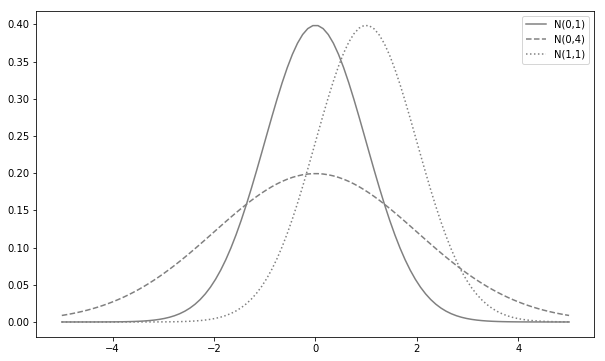

In [244]:
# 표준정규분포의 구간
# 예: 표준정규분포의 95% 구간

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(-5,5,100)
params = [(0,1),(0,2),(1,1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu},{sigma**2})', ls=ls, color='gray')
ax.legend()
plt.show() 

### 지수분포 --- p.57
못했음

### 카이제곱분포 --- p.65
- 10장 이후에 설명하는 추정과 검정에 사용하는 특수한 확률분포
- 분산의 구간추정이나 독립성 검정에서 사용


In [253]:
# - σ𝑖=110 𝑍𝑖^2 에서 무작위추출한 표본크기 100만의 표본 데이터 --- p. 66

n = 10
rv = stats.norm()
sample_size = int(1e6)
# 표준정규분포에서 표본크기 100만으로 무작위 추출
Zs_sample = rv.rvs((n, sample_size))
# axis=0에서 총합을 구하고, 표준정규분포의 제곱합 표본 데이터를 구함
chi2_sample = np.sum(Zs_sample ** 2, axis=0)
chi2_sample.shape

(1000000,)

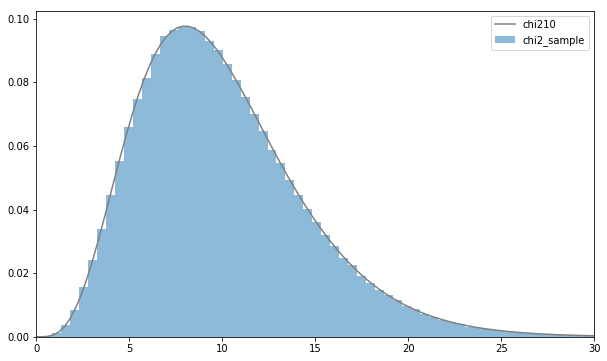

 -> 히스토그램과 밀도함수가 일치하고 σ𝑖=110 𝑍𝑖2가 χ2 10 이 된다.


In [256]:
# - σ𝑖=110 𝑍𝑖^2에서 무작위추출한 표본 데이터의 히스토그램과 χ2 10 의 밀도함수 --- p.67

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
       alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2{n}', color='gray')

ax.legend()
ax.set_xlim(0,30)
plt.show()

print(' -> 히스토그램과 밀도함수가 일치하고 σ𝑖=110 𝑍𝑖2가 χ2 10 이 된다.')

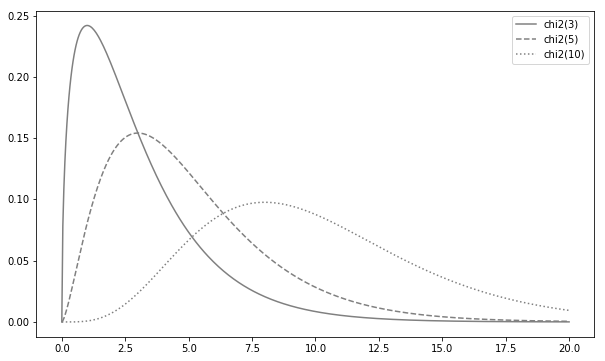

좌우비대칭으로, 왼쪽으로 치우치고 오른쪽으로 넓어집니다.
자유도가 커지면 좌우대칭에 가까워집니다.
자유도의 값 가까이에 분포의 장점이 있습니다.


In [259]:
# 자유도 𝑛에 따라 변화하는 카이제곱분포
# 𝑛 = 3, 5, 10일 때

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3,5,10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
           label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

print('좌우비대칭으로, 왼쪽으로 치우치고 오른쪽으로 넓어집니다.')
print('자유도가 커지면 좌우대칭에 가까워집니다.')
print('자유도의 값 가까이에 분포의 장점이 있습니다.')

### t 분포 --- p.72
- 정규분포에서 모평균의 구간추정 등에 사용되는 확률분포

In [260]:
# 𝑍~N(0, 1)과 𝑌~χ2 10 , 𝑍𝑌/10에서 무작위추출 --- p.74
# 자유도 10인 t분포 생성
# scipy.stats에서는 t분포를 따르는 확률변수를 t함수로 생성할 수 있고,인수에 자유도 지정

n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)

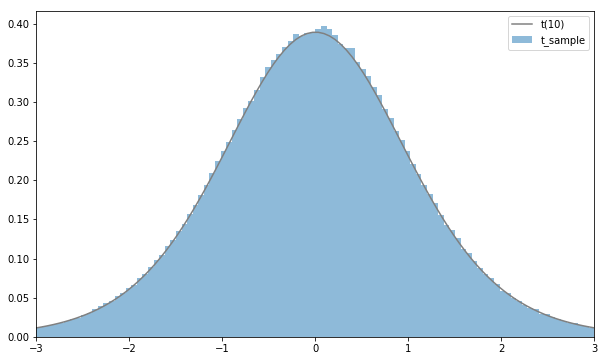

In [262]:
# 𝑍𝑌/10에서 무작위추출한 표본 데이터의 히스토그램과 밀도함수

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3,3,100)
ax.hist(t_sample, bins=100, range=(-3,3),
       density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3,3)

plt.show()

In [263]:
rv = stats.t(5)
rv.isf(0.05)

2.0150483726691575

### F 분포 --- p.80
- 분산분석 등에서 사용되는 확률분포

In [264]:
n1 = 5
n2 =10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)
f_sample.shape

(1000000,)

(199,)


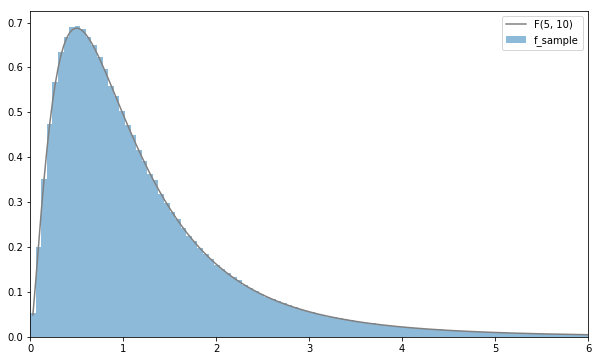

In [267]:
# p.82~83

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2)

xs = np.linspace(0, 6, 200)[1:]
print(xs.shape)

ax.hist(f_sample, bins=100, range=(0,6),
       density=True, alpha=0.5, label='f_sample')
ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})', color='gray')

ax.legend()
ax.set_xlim(0,6)
plt.show()

## 독립 동일 분포 --- p.87
독립성
합의 분포
표본평균의 분포


### 독립성 --- p.90
– 확률변수가 독립이라는 것은 확률변수가 다른 확률변수에 영향을 끼치지 않는다는 의미

– 독립이고 다차원 확률변수를 다루는 이유는 통계뿐석에서 취급하는 데이터 중 상당수가 독립이면서 다차원인 확률변수의 실현값

– 4장의, 우연히 만난 20명의 점수 은 서로 독립인 20차원의 확률변수

– 서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수는 독립동일분포(iid) 

In [272]:
linestyles = ['-', '--', ':', '-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [273]:
# 불공정한 주사위의 예

x_set = np.array([1,2,3,4,5,6])
y_set = np.array([1,2,3,4,5,6])

def f_XY(x,y):
    if x in x_set and y in y_set:
        return x*y/441
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [274]:
Cov(XY)

-8.326672684688674e-17

In [275]:
# 무상관인데 독립이 아닌 예 - 독립성이 무상관성보다 더욱 강한 개념 p.95

x_set = np.array([0,1])
y_set = np.array([-1, 0, 1])

def f_XY(x, y):
    if (x, y) in [(0,0),(1,1),(1,-1)]:
        return 1/3
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [277]:
# 무상관인데 독립이 아닌 예 - 확률변수 X와 Y의 공분산 --- p.96

print(Cov(XY))
print('-> 공분산이 0이므로 X와 Y는 무상관')

0.0
-> 공분산이 0이므로 X와 Y는 무상관


In [279]:
# X와 Y가 독립인지 확인
print(f_X(0) * f_Y(0), f_XY(0,0))
print(' -> f_XY(0,0) = f_X(0) * f_Y(0)이 성립하지 않으므로 X와 Y는 독립이 아님')

0.1111111111111111 0.3333333333333333
 -> f_XY(0,0) = f_X(0) * f_Y(0)이 성립하지 않으므로 X와 Y는 독립이 아님


### 합의 분포 --- p.90
정규분포의 합의분포

### 정규분포의 합의분포 --- p.98

In [281]:
#두 확률변수 X~N(1, 2)와 Y~N(2, 3)일 때, X+Y의 분포
# 기댓값
# 분산

rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(3.0015089101693837, 5.011089899932521)

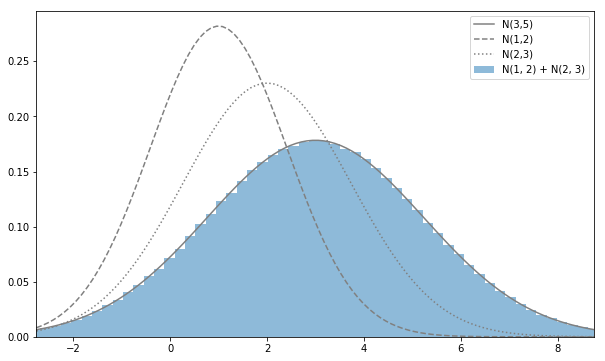

In [284]:
# 재생성(reproductive property) - 동일한 분포를 따르는 2개의 독립인 확률변수의 합도 동일한 확률분포

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True,
        alpha=0.5, label='N(1, 2) + N(2, 3)')
ax.plot(xs, rv.pdf(xs), label='N(3,5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1,2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2,3)', ls=':', color='gray')

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()

In [285]:
### 포아송 분포의 합의분포 --- p.102

rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(7.002904, 7.014029566784001)

C:\Users\0114m\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


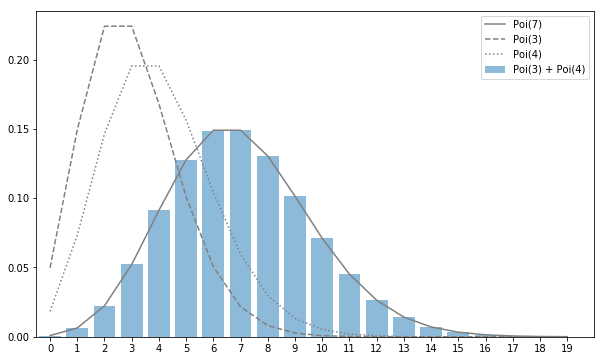

In [286]:
# 포아송 분포도 재생성을 가진 확률분포 X+Y ~ Poi(7) ---p.103

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist,_ = np.histogram(sum_sample, bins=20, range=(0,20), normed=True)

ax.bar(xs, hist, alpha=0.5, label='Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label='Poi(7)', color='gray')
ax.plot(xs, rv1.pmf(xs), label='Poi(3)', ls='--', color='gray')
ax.plot(xs, rv2.pmf(xs), label='Poi(4)', ls=':', color='gray')

ax.legend()
ax.set_xlim(-0.5,20)
ax.set_xticks(np.arange(20))
plt.show()

### 베르누이 분포의 합의 분포 --- p.106

In [290]:
# 기댓값은 100.3=3, 분산은 100.3(1-0.3)=2.1

p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10, sample_size))
sum_sample = np.sum(Xs_sample, axis=0)

print(np.mean(sum_sample), np.var(sum_sample))
print('베르누이 분포는 재생성이 없음')

3.002565 2.103310420775
베르누이 분포는 재생성이 없음


C:\Users\0114m\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


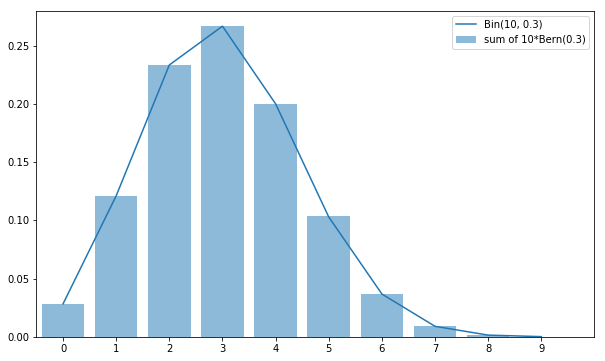

In [292]:
# Bin(10, 0.3)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.binom(10, p)
xs = np.arange(10)
hist,_ = np.histogram(sum_sample, bins=10,
                     range=(0,10), normed=True)
ax.bar(xs, hist, alpha=0.5, label='sum of 10*Bern(0.3)')
ax.plot(xs, rv.pmf(xs), label='Bin(10, 0.3)')
ax.legend()
ax.set_xlim(-0.5,10)
ax.set_xticks(np.arange(10))
plt.show()

### 표본평균의 분포 --- p.110

In [293]:
# 평균 1, 분산 2/10

mean = 1
var = 2
rv = stats.norm(mean, np.sqrt(var))

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(Xs_sample, axis=0)

np.mean(sample_mean), np.var(sample_mean)

(0.9994631961249677, 0.19988368641615067)

### 포아송 분포의 표본평균 분포 --- p.117

### 대수의 법칙 --- p.121

In [314]:
np.random.seed(0)

In [315]:
# 표본크기를 키우면 표본평균은 모평균에 수렴
# 주사위를 굴리는 횟수를 늘리면 6이 나오는 확률은 1/6 에 수렴

p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n,4))
space = np.linspace(100, n, 50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0)
                     for sp in space]).T
plot_list.shape

(4, 50)

In [316]:
#sample

In [317]:
#for sp in space:
#    print(sample[:sp])

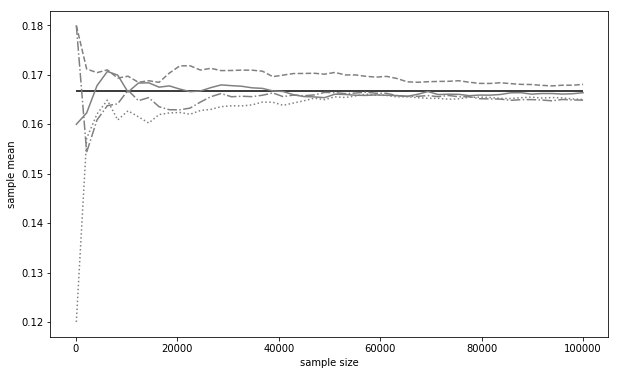

표본 크기가 작을 때는 변동이 있지만, 표본 크기가 커지면서 어떠한 무작위추출도 그 결과는 1/6에 가까워지고 있음을 알 수 있다.


In [318]:


fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list, linestyles):
    ax.plot(space, pl, ls=ls, color='gray')
    
ax.hlines(p, -1, n, 'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()
print('표본 크기가 작을 때는 변동이 있지만, 표본 크기가 커지면서 어떠한 무작위추출도 그 결과는 1/6에 가까워지고 있음을 알 수 있다.')

In [319]:
1/6

0.167

In [320]:
space

array([   100,   2138,   4177,   6216,   8255,  10293,  12332,  14371,
        16410,  18448,  20487,  22526,  24565,  26604,  28642,  30681,
        32720,  34759,  36797,  38836,  40875,  42914,  44953,  46991,
        49030,  51069,  53108,  55146,  57185,  59224,  61263,  63302,
        65340,  67379,  69418,  71457,  73495,  75534,  77573,  79612,
        81651,  83689,  85728,  87767,  89806,  91844,  93883,  95922,
        97961, 100000])

In [ ]:
np.mean(sample[:4177], axis=0)